In [68]:
import pandas as pd
#import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression


from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from tpot import TPOTRegressor
from xgboost import XGBRegressor

Reading in the file

In [66]:
df_raw = pd.read_csv("data/preprocessed.csv")
df_raw.iloc[:,0:15].head()

,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamecategory_cnt,boardgamemechanic_cnt
0,1,4,60,120,12,31254,8.85292,1.59819,3.8078,1311,1,3,9,5,12
1,2,4,60,60,13,34729,8.62499,1.59463,2.8301,971,2,1,11,2,8
2,2,4,120,120,14,18269,8.49419,1.49542,4.3850,891,1,4,13,3,5
3,2,4,60,120,14,10070,8.62031,1.22876,3.9122,467,3,3,8,3,8
4,2,2,120,180,13,36644,8.31307,1.58290,3.5724,3344,2,5,12,3,9


## Train/Test split 
We will use a 80/20 train test split and do parametertuning using 10-fold CV

In [27]:
X = df_raw.drop(["average","usersrated","stddev","numweights"], axis=1)
y = df_raw["average"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

pipeline = Pipeline([
    
    ("regressor", ElasticNet())
])

param_grid = {
    "regressor__alpha": [0.001,0.1,0.3,0.7,1],
    "regressor__l1_ratio": [0,0.2,0.4,0.6,0.8,0.99]
}

grid = GridSearchCV(pipeline, param_grid, cv=10)
grid.fit(X_train, y_train)


r2 = grid.score(X_test, y_test)
print("R2 score: {:.2f}%".format(r2))

C:\ProgramData\Anaconda3\envs\42_VU_BI_2022_Assignment_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.567e+03, tolerance: 1.479e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\42_VU_BI_2022_Assignment_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.593e+03, tolerance: 1.480e+00 Linear regression models with null weight for the l1 regularization term are more efficien

C:\ProgramData\Anaconda3\envs\42_VU_BI_2022_Assignment_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.047e+03, tolerance: 1.505e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\42_VU_BI_2022_Assignment_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.008e+03, tolerance: 1.488e+00 Linear regression models with null weight for the l1 regularization term are more efficien

C:\ProgramData\Anaconda3\envs\42_VU_BI_2022_Assignment_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.549e+03, tolerance: 1.479e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\42_VU_BI_2022_Assignment_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.579e+03, tolerance: 1.480e+00 Linear regression models with null weight for the l1 regularization term are more efficien

C:\ProgramData\Anaconda3\envs\42_VU_BI_2022_Assignment_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.770e+03, tolerance: 1.505e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\42_VU_BI_2022_Assignment_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.716e+03, tolerance: 1.488e+00 Linear regression models with null weight for the l1 regularization term are more efficien

R2 score: 0.37%


In [29]:
grid.best_params_

{'regressor__alpha': 0.001, 'regressor__l1_ratio': 0.4}

usersrated stddev numweights

In [26]:
reg = ElasticNetCV(cv=10, random_state=12).fit(X_train, y_train)
reg.score(X_test, y_test)

0.3419873339628783

In [33]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.4280805337727195

<AxesSubplot: >

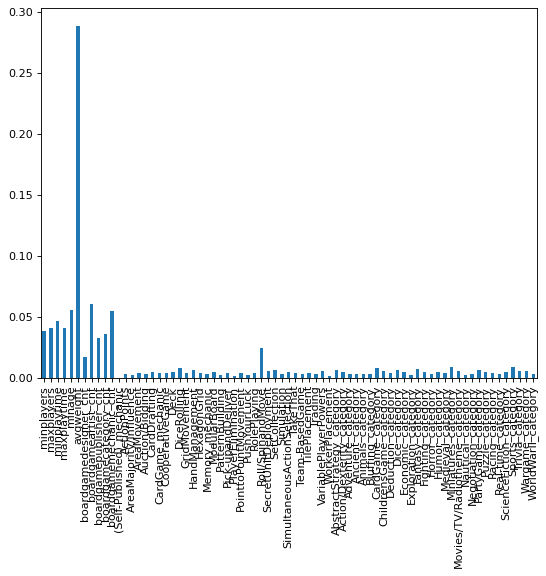

In [51]:
plt.figure(figsize=(8, 6), dpi=80)
forest_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
forest_importances.plot.bar()

In [54]:
lin = LinearRegression()
lin.fit(X_train, y_train)
lin.score(X_test, y_test)

0.3718713619329229

In [64]:
xg = XGBRegressor()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

0.4154341830313999

# Testing 

(0.0, 1000.0)

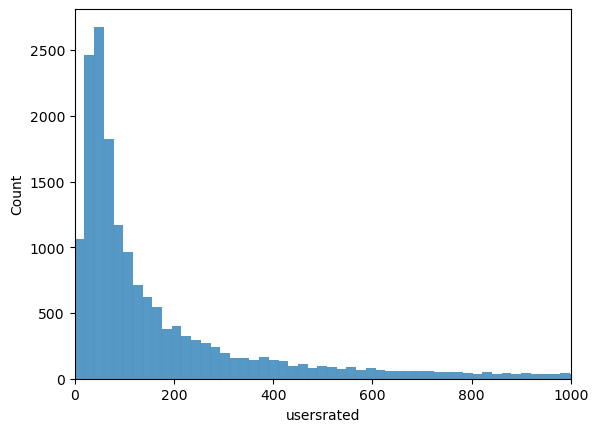

In [70]:
sns.histplot(df_raw['usersrated'])
plt.xlim([0, 1000])

In [73]:
counter = 400
percentage = (df_raw.loc[:,"usersrated"] >= counter).sum()/20000 
print("{}% of {} is over {}".format(round(100*percentage,1),"usersrated",counter))

19.7% of usersrated is over 400


Testing the top 20% and bottom 80% of "usersrated" (amount of ratings per game)

In [101]:
print('R2 for top 20% of "usersrated": {}'.format(forest.score(X_test[df_raw.iloc[X_test.index,5] >= 400], y_test[df_raw.iloc[X_test.index,5] >= 400])))
print('R2 for bottom 80% of "usersrated": {}'.format(forest.score(X_test[df_raw.iloc[X_test.index,5] < 400], y_test[df_raw.iloc[X_test.index,5] < 400])))

R2 for top 20% of "usersrated": 0.45135764796222166
R2 for bottom 80% of "usersrated": 0.3792225835969989


In [91]:
print(forest.score(X_test[df_raw.iloc[X_test.index,5] >= 400], y_test[df_raw.iloc[X_test.index,5] >= 400]))
forest.score(X_test[df_raw.iloc[X_test.index,5] < 400], y_test[df_raw.iloc[X_test.index,5] < 400])

,minplayers,maxplayers,minplaytime,maxplaytime,minage,avgweight,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamecategory_cnt,...,Negotiation_category,PartyGame_category,Puzzle_category,Racing_category,Real-time_category,ScienceFiction_category,Sports_category,Trivia_category,Wargame_category,WorldWarII_category
2193,2,8,15,15,8,1.1364,1,2,1,4,...,0,1,0,0,0,0,0,1,0,0
1369,1,4,60,90,10,2.7188,3,3,4,4,...,0,0,0,0,0,0,0,0,1,0
540,2,5,50,125,14,2.6575,1,4,2,4,...,0,0,0,0,0,0,0,0,0,0
513,1,6,45,60,8,2.0000,2,2,10,6,...,0,0,0,0,0,0,0,0,0,0
1571,2,5,20,30,8,1.6562,1,7,6,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,2,4,30,30,12,2.3708,1,1,12,1,...,0,0,0,0,0,0,0,0,0,0
3037,2,4,45,45,9,1.8411,1,1,2,3,...,0,0,0,0,0,0,0,0,0,0
4931,2,5,90,90,12,3.0571,1,1,3,5,...,0,0,0,0,0,0,0,0,0,0
1568,2,5,60,60,10,2.6552,1,1,4,2,...,0,0,0,0,0,1,0,0,0,0
